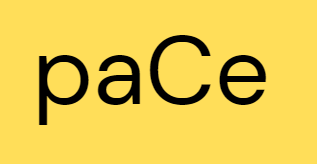

# Finding addiction cause!

In [1]:
# importing lib
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

importing data set using pandas pd.read_ function

In [2]:
sight = pd.read_excel("data/games_bet.xlsx")

In [3]:
games2 = pd.read_excel("data/bet_2.xlsx")

In [ ]:
# Identifying null columns
print(f"total number of null values are \n {games2.isna().sum()}")
print(f"total number of null values are \n {sight.isna().sum()}")

total number of null values are 
 id                       0
game_id                  0
user_id                  0
username                 0
bet_id                   0
game_type                0
odds                     0
bet_status               0
Payment_Type             0
payment_bet_amount       0
Payment_win_amount       0
Payment_profit_amount    0
dtype: int64
total number of null values are 
 id                     0
game_id                0
max_rate               0
total_bet_amount       0
total_win_amount       0
total_profit_amount    0
player_count           0
bet_count              0
timestamp              0
date                   0
date2                  0
Time                   0
dtype: int64


Copying the columns and removing unwanted column and using the rest of dataset for evaluation

In [4]:
sight2 = sight.copy()

In [5]:
sight2.drop(columns={"date","Time"},axis = 1, inplace=True)

In [6]:
games = games2.copy()

In [7]:
games.drop(columns = {"username","game_type","bet_status","Payment_Type"}, axis=1, inplace=True)

In [8]:
deef = games2.copy()

In [9]:
deef.drop(columns = {"username","Payment_Type"}, axis=1, inplace=True)

In [10]:
# Identifying columns conversion from string to categorical values 

print(f"unique values in game type are{deef["game_type"].unique()}")
print(f"unique values in bet status are{deef["bet_status"].unique()}")

unique values in game type are['normal' 'yellow' 'red' 'green']
unique values in bet status are['lose' 'win']


In [28]:
deef["game_type"].value_counts()

game_type
normal    262648
red        16210
green      15459
yellow      5683
Name: count, dtype: int64

In [29]:
# Target column
games2[["bet_status"]].value_counts(dropna=False)

bet_status
lose          155513
win           144487
Name: count, dtype: int64

# Pairplot  for identifying relationships between variables

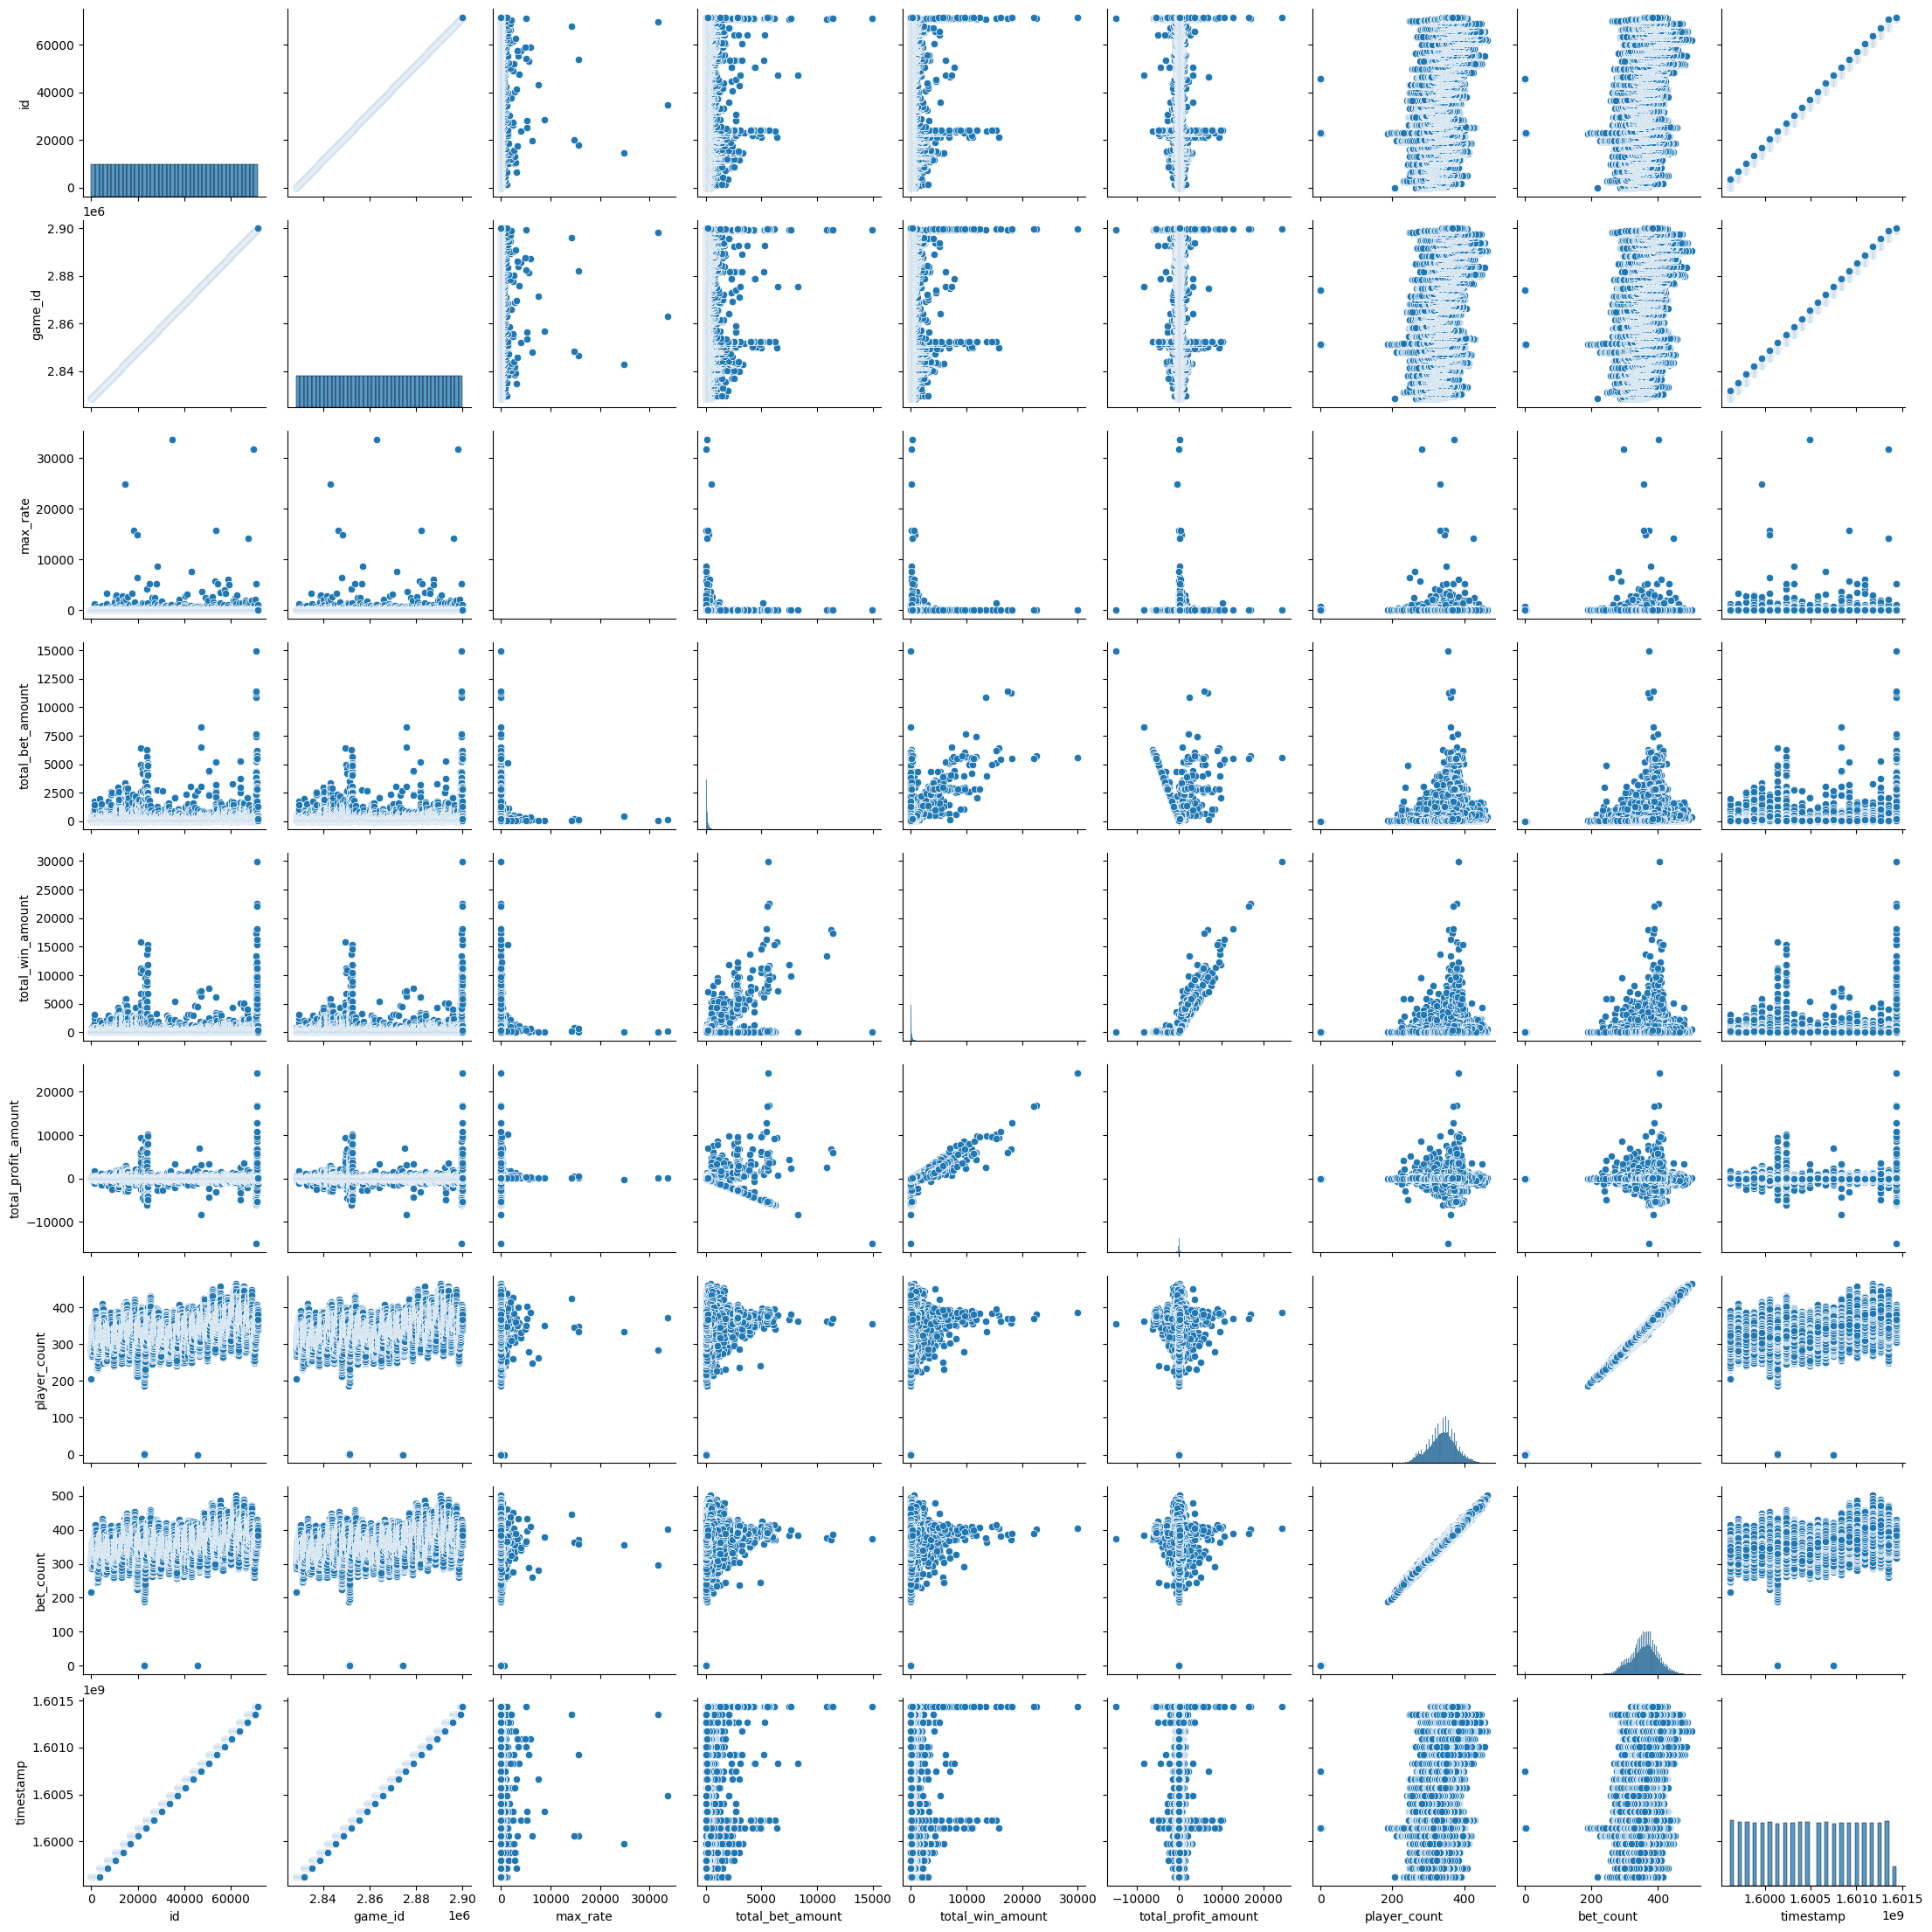

Importing necessary library from `sklearn` for constructing `decision tree`

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics


In [12]:
# creating dummy data set using one hot encoding for implementing it into decision tree

deef["game_type"] = (
    deef["game_type"].astype("category")
    .cat.set_categories(["normal","yellow","red","green"])
    .cat.codes
)

deef["bet_status"] = (
    deef["bet_status"].astype("category")
    .cat.set_categories(["lose","win"])
    .cat.codes
)
deef = pd.get_dummies(deef, drop_first= False)
deef.head()

,id,game_id,user_id,bet_id,game_type,odds,bet_status,payment_bet_amount,Payment_win_amount,Payment_profit_amount
0,1,2828375,173570,210854317,0,0.0,0,0,0,0
1,2,2828375,1339924,12148553,1,0.0,0,8,0,-8
2,3,2828375,1139219,210854260,0,2.0,1,0,0,0
3,4,2828375,1329183,12148544,1,0.0,0,67,0,-67
4,5,2828375,1378328,210854292,0,0.0,0,0,0,0


In [13]:
deef["game_type"].value_counts()

game_type
0    262648
2     16210
3     15459
1      5683
Name: count, dtype: int64

`normal 0` -> `red 2` -> `green 3` -> `yellow 1`

In [14]:
# training and testing the model using train_test_split func()
y = deef["bet_status"]

X = deef.copy()
X = X.drop("bet_status", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Calling decision tree classifier and fitting the dataset  into it 

In [15]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

# Classification report with tree graph

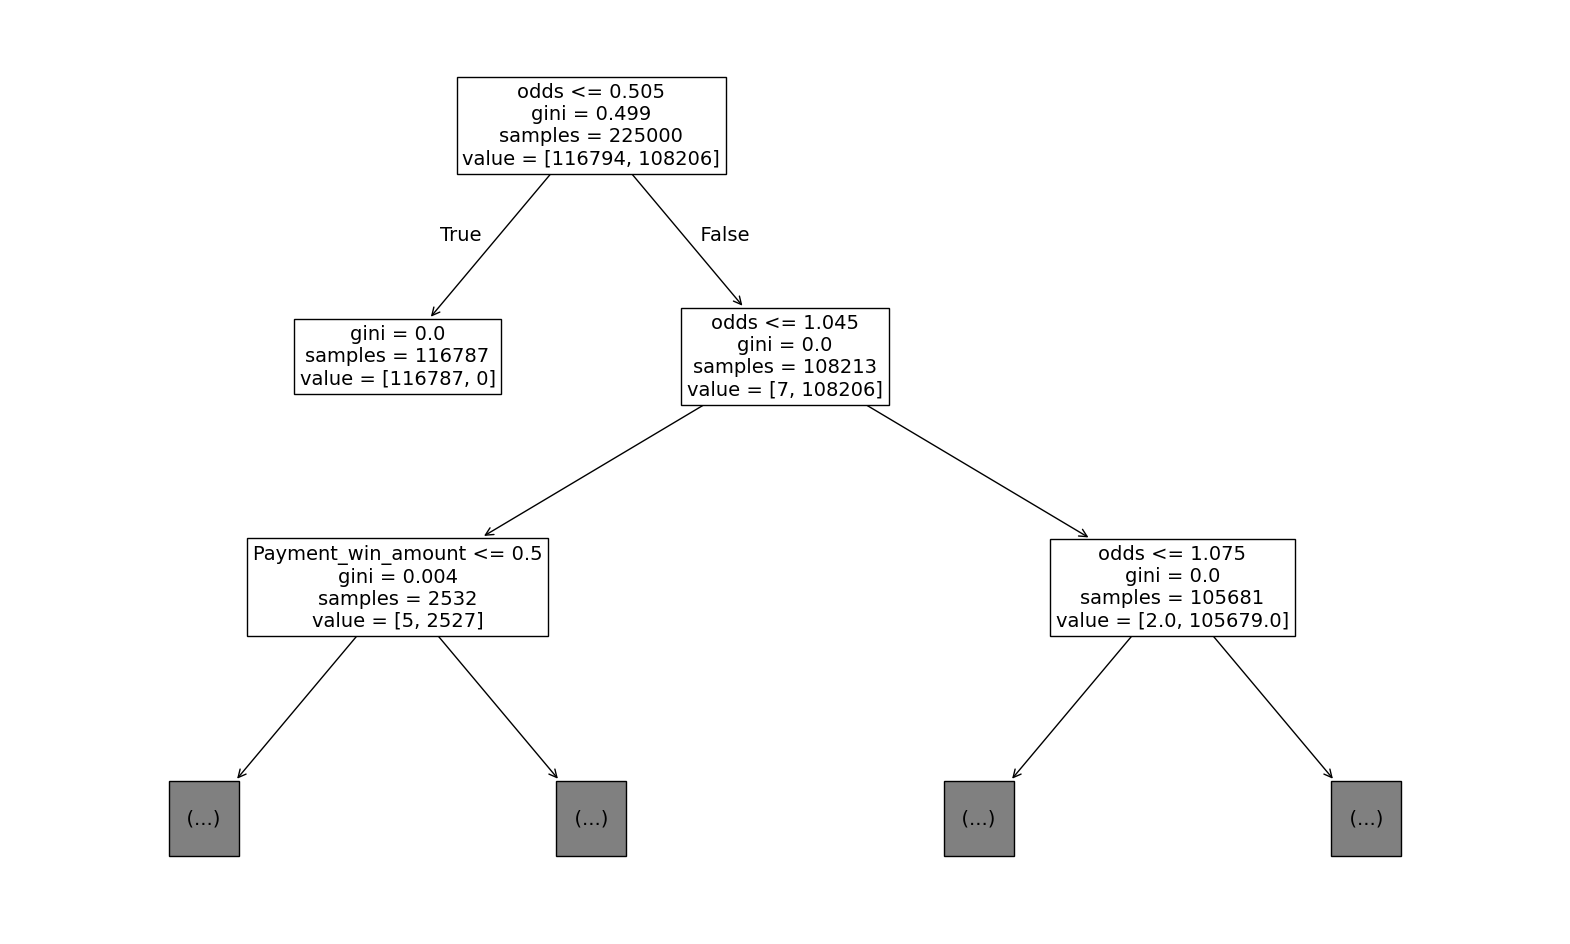

In [16]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

In [17]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.999947
Precision: 0.999917
Recall: 0.999972
F1 Score: 0.999945


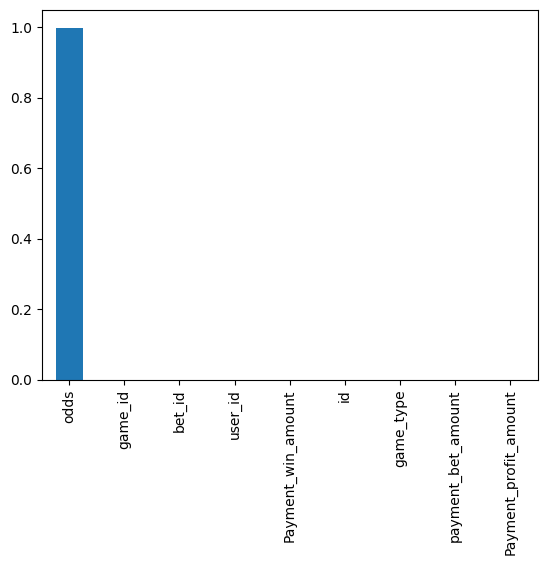

In [18]:
# Identifying major column contributers 
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [19]:
deef2 = sight.copy()
deef2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71625 entries, 0 to 71624
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   71625 non-null  int64         
 1   game_id              71625 non-null  int64         
 2   max_rate             71625 non-null  float64       
 3   total_bet_amount     71625 non-null  float64       
 4   total_win_amount     71625 non-null  float64       
 5   total_profit_amount  71625 non-null  float64       
 6   player_count         71625 non-null  int64         
 7   bet_count            71625 non-null  int64         
 8   timestamp            71625 non-null  int64         
 9   date                 71625 non-null  datetime64[ns]
 10  date2                71625 non-null  datetime64[ns]
 11  Time                 71625 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memory usage: 6.6+ MB


In [20]:
deef2.drop(columns={"Time",'date','id','game_id'},axis=1,inplace=True)


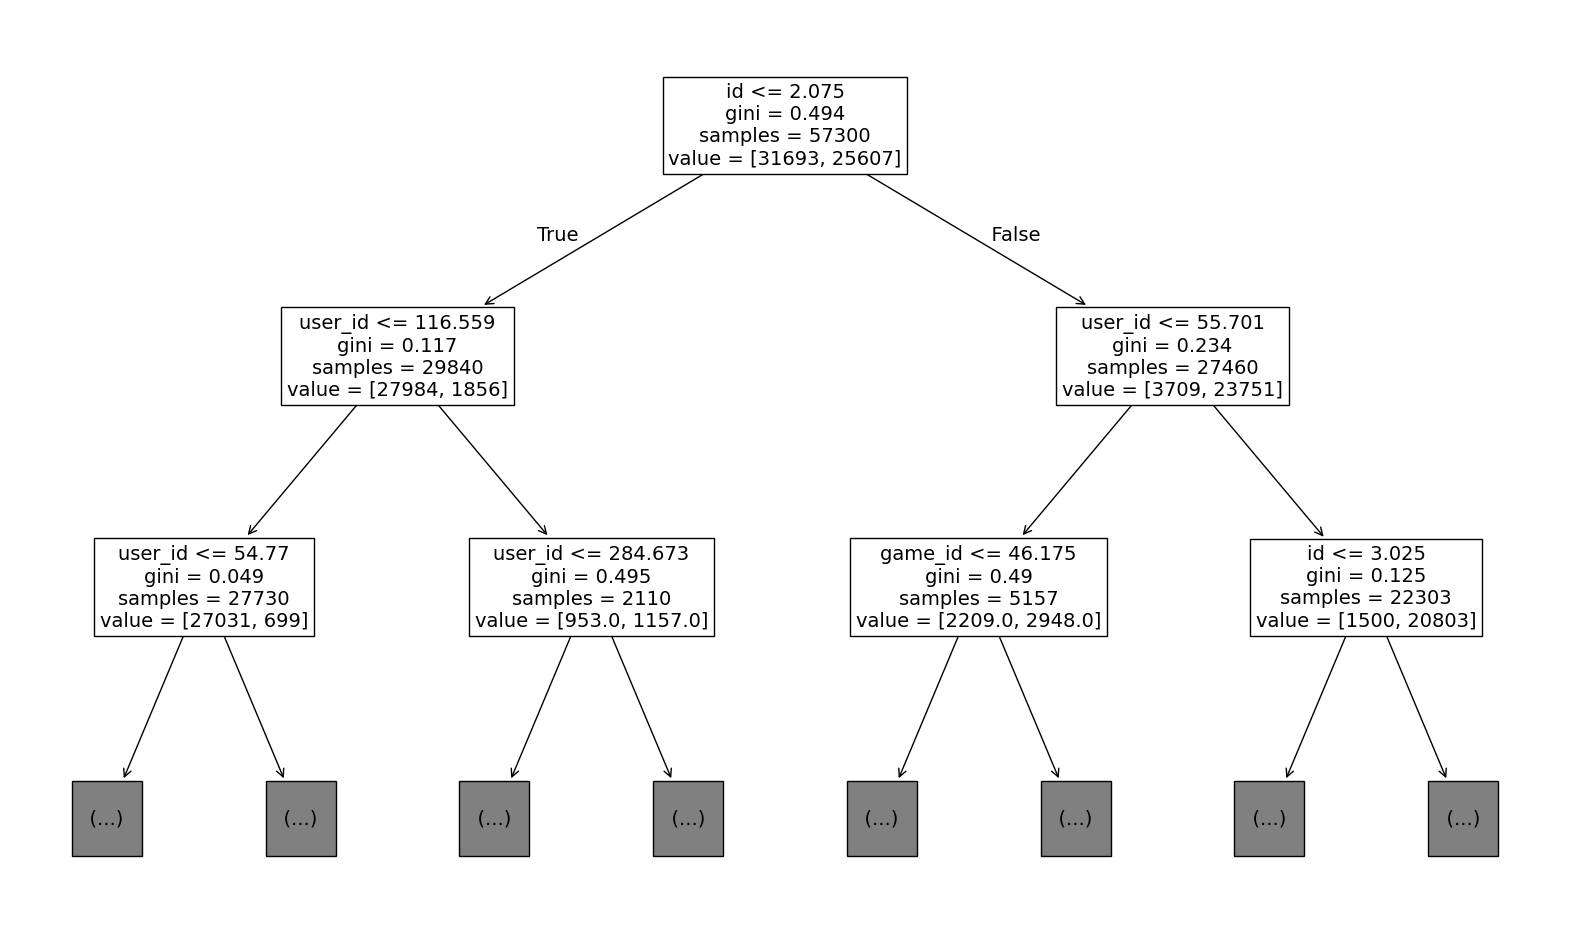

In [21]:

# Create target variable
deef2['is_profitable'] = (deef2['total_profit_amount'] > 0).astype(int)

# Select features
features = ['max_rate', 'total_bet_amount', 'total_win_amount', 'player_count', 'bet_count']
X2 = deef2[features]
y2 = deef2['is_profitable']

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

decision_tree2 = DecisionTreeClassifier(random_state=0)

decision_tree2.fit(X2_train, y2_train)

dt_pred2 = decision_tree2.predict(X2_test)

# Train decision tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree2, max_depth=2, fontsize=14, feature_names=X.columns);

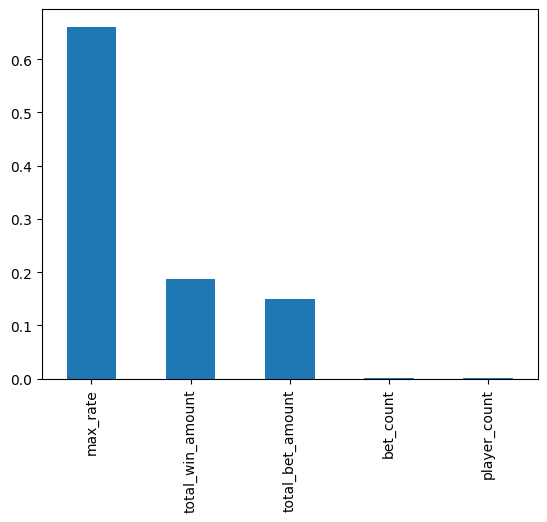

In [22]:
# Identifying major column contributers
importances = decision_tree2.feature_importances_

forest_importances = pd.Series(importances, index=X2.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [23]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y2_test, dt_pred2))
print("Precision:", "%.6f" % metrics.precision_score(y2_test, dt_pred2))
print("Recall:", "%.6f" % metrics.recall_score(y2_test, dt_pred2))
print("F1 Score:", "%.6f" % metrics.f1_score(y2_test, dt_pred2))

Decision Tree
Accuracy: 0.990297
Precision: 0.988454
Recall: 0.990131
F1 Score: 0.989292


# Conclusion of Investigation

Our analysis reveals that `max_rate` and `odds` significantly influence a player's betting behavior at specific timestamps. When both `max_rate` and `odds` are favorable, players are more likely to place bets at those times. This can lead to increased engagement in upcoming games and may encourage players to bet repeatedly.

Additionally, changes in `max_rate`and `odds` directly impact the potential winnings, which in turn affects the bet amount. To better understand this behavior, we need to identify the time intervals when these conditions are met and determine whether players are becoming addicted or betting spontaneously during different time periods in a given session.